# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.base_task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

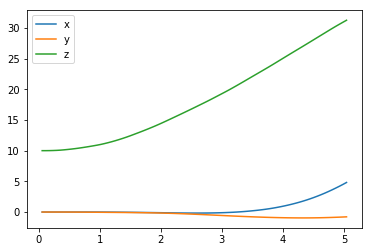

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

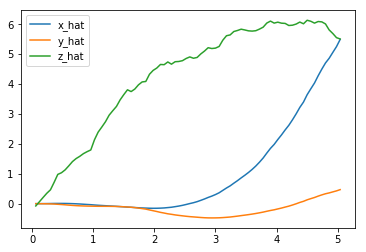

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

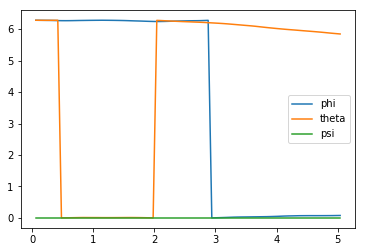

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

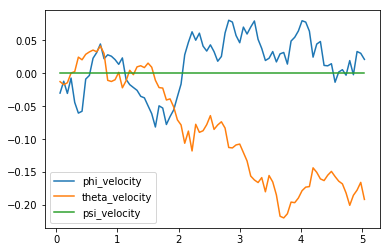

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

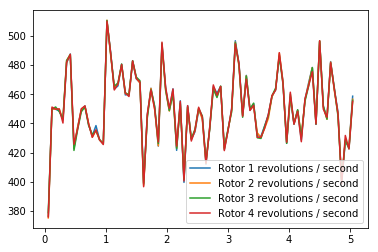

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 4.81599148 -0.78159003 31.2383488   0.07744322  5.84658481  0.        ]
[5.49098631 0.469027   5.50649483]
[ 0.0210356  -0.19142332  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.base_task import Task

num_episodes = 50
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   50, score =  -6.000 (best =  -6.000), noise_scale = 3.25

C:\Repos\udacity\quadcopter-project\physics_sim.py:114: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
C:\Repos\udacity\quadcopter-project\physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
## TODO: Train your agent here
import os
import pickle
from agents.agent import DDPG_Agent
from tasks.task import Task
#from tasks.task import Task

exportPath = './data/'
if not os.path.exists(exportPath):
    os.makedirs(exportPath)

# z axis is up
init_pose = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0]) 
target_pos = np.array([0.0, 0.0, 10.0])
task = Task(init_pose=init_pose, target_pos=target_pos, runtime=5.0)
#agent = PolicySearch_Agent(task) 
#agent = Basic_Agent(task) 
agent = DDPG_Agent(task)

# before training
resultsAll = []
high_score = -1000000.0
low_score = 1000000.0

# number of episodes to train
num_episodes = 250

training_results = {
    'score': [],
    }

for i_episode in range(1, num_episodes+1):
    # start a new episode
    state = agent.reset_episode() 
    score = 0

    episode_results = {
        'time': [],
        'x': [],
        'y': [],
        'z': [],
        'phi': [],
        'theta': [],
        'psi': [],
        'vx': [],
        'vy': [],
        'vz': [],
        'reward': [],
        }

    while True:
        action = agent.act(state)  
        next_state, reward, done = task.step(action)

        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        high_score = max(high_score, score)
        low_score = min(low_score, score)

        # track the results for offline analysis
        episode_results['time'].append(task.sim.time)
        episode_results['x'].append(state[0])
        episode_results['y'].append(state[1])
        episode_results['z'].append(state[2])
        episode_results['phi'].append(state[3])
        episode_results['theta'].append(state[4])
        episode_results['psi'].append(state[5])
        episode_results['vx'].append(state[6])
        episode_results['vy'].append(state[7])
        episode_results['vz'].append(state[8])
        episode_results['reward'].append(reward)
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f}, low score = {:7.3f}, high score = {:7.3f}".format(i_episode, score, low_score, high_score), end="")
            training_results['score'].append(score)
            break

    resultsAll.append(episode_results)

    sys.stdout.flush()

# save results for later analysis
with open("{}results0.bin".format(exportPath), 'wb') as pickleFile:
    pickle.dump(resultsAll, pickleFile)

Episode =    1, score =  86.228, low score =   0.214, high score =  86.228

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## plot rewards over all episodes
plt.plot(training_results['score'], label='reward')
plt.legend()
_ = plt.ylim()

In [ ]:
## Render top result
with open('data/results0.bin', 'rb') as pickleFile:
    results = pickle.load(pickleFile)

# Sort wrt episode reward
episodeRewards = [np.sum(r['reward']) for r in results]
resultIndices = np.argsort(episodeRewards)

# Get top results
resultIndices = list(reversed(resultIndices))[0:1]

In [ ]:
# Plot reward for top result
for iE, e in enumerate(resultIndices):
    res = results[e]
    
    # plot reward
    plt.plot(res['time'], res['reward'], label='reward')
    plt.legend()
    _ = plt.ylim()
    

In [ ]:
# Plot position for top result
for iE, e in enumerate(resultIndices):
    res = results[e]   
    
    plt.plot(res['time'], res['x'], label='x')
    plt.plot(res['time'], res['y'], label='y')
    plt.plot(res['time'], res['z'], label='z')
    plt.legend()
    _ = plt.ylim()

In [ ]:
# Plot angular velocity for top result
for iE, e in enumerate(resultIndices):
    res = results[e]   
    
    plt.plot(res['time'], res['phi'], label='phi')
    plt.plot(res['time'], res['theta'], label='theta')
    plt.plot(res['time'], res['psi'], label='psi')
    plt.legend()
    _ = plt.ylim()

In [ ]:
# Plot velocity for top result
for iE, e in enumerate(resultIndices):
    res = results[e]   
    
    plt.plot(res['time'], res['vx'], label='vx')
    plt.plot(res['time'], res['vy'], label='vy')
    plt.plot(res['time'], res['vz'], label='vz')
    plt.legend()
    _ = plt.ylim()

In [ ]:
## Generate visualisation
from visualise import Quadrotor
from IPython.display import Image
import os
import imageio

exportPath = './video/'
if not os.path.exists(exportPath):
    os.makedirs(exportPath)
        
images = []

for iE, e in enumerate(resultIndices):
    res = results[e] 
   
    filepath = "{}frame{:04}_{:04}.png".format(exportPath, iE, 0)
    
    q = Quadrotor(x=res['x'][0], 
            y=res['y'][0], 
            z=res['z'][0], 
            roll=res['phi'][0],
            pitch=res['theta'][0], 
            yaw=res['psi'][0],
            reward=res['reward'][0], 
            title=None,
            filepath=filepath)
    
    q.set_target(0.0, 0.0, 10.0)
    
    # Render all frames in this episode
    for i in range(1, len(res['x'])):
        filepath = "{}frame{:04}_{:04}.png".format(exportPath, iE, i)
        
        q.update_pose(x=res['x'][i], 
        y=res['y'][i], 
        z=res['z'][i], 
        roll=res['phi'][i],
        pitch=res['theta'][i], 
        yaw=res['psi'][i],
        reward=res['reward'][i],
        title=None,
        filepath=filepath)
        
        images.append(imageio.imread(filepath))
        
    q.close()   
    
# Save all frames to animated gif
imageio.mimsave("movie.gif", images)

# Render animated gif
with open('./movie.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

The algorithm used for learning is Deep Deterministic Policy Gradients (DDPG) as described in the [Continuous control with deep reinforcement learning](https://arxiv.org/abs/1509.02971) paper. The choice was based on the requirement to support learning in a continuous action space.

The implementation was based on source code provided in the project classroom but modified to use the neural network architecture defined in the original paper. The state space was also extended to include velocity in addition to pose. 

After many iterations of parameter tuning without any significant progress I switched from a tanh activation to a sigmoid activation in final layer of the actor network which immediately boosted the networks ability to learn.

In general the agent learned to take and fly to the target but become unstable when loitering for any length of time. Small changes to the weights used in the reward function would have large impacts on the agents ability to fly the task.

*Hyperparameters*
Initial hyperparameters based on the [Continuous control with deep reinforcement learning](https://arxiv.org/abs/1509.02971) paper. The primary difference was the use of a sigmoid activation in final layer of the actor network rather than tanh.

- Actor learning rate = 0.0001 
- Critic learning rate = 0.001 
- Discount factor $\gamma$ = 0.99
- Soft targets $\tau$ = 0.001
- Minibatch size = 64
- Replay buffer size = 1000000
- Exploration Noise Process = Ornstein-Uhlenbeck ($\theta$ = 0.15, $\alpha$ = 0.2)

*Actor Neural Network Architecture*

The actor architecture used two hidden layers of 400 and 300 respectively both with weight regularization and relu activation. Batch normalisation was also used after each hidden layer.

The final output layer used a sigmoid activation with weights initialised to Uniform $[-3e-3, 3e-3]$. The output was then scaled to the action dimension $[0-1]$

*Critic Neural Network Architecture*

The critic architecture used two hidden layers of 400 and 300 respectively both with l2 weight regularization and relu activation. Batch normalisation was also used after each hidden layer.

The action tensor was combined in the 2nd hidden layer using a relu activation.

The final output layer connected to one output representing Q values with weights initialised to Uniform $[-3e-3, 3e-3]$.



**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Based on the episode rewards plot the agent learned to maximise the reward in the first few episodes which then dropped off overtime. Based on this it appeared the agent learnt the task easily. 

However, the reward function did not provide enough incentive to enable the agent to learn the loitering component of the task in addition to the take-off and fly to target component.

Despite much tuning of the reward function and network architecture it was difficult to generate a gradual learning curve. 

Some of the attempts to improve the learning curve included:
- Disbaling l2 weight regularization in both actor and critic networks
- Disabling random weights initialization in actor final output layer
- The use of sigmoid vs tanh activation functions
- Increasing actor learnign rate by factor 10
- Increasing critic learning rate by factor 10
- Increasing number of episodes - 500, 1000, 1500, 2000
- Increasing penalties by factor 10
- Decreasing penalties by factor 10
- Increased exploration noise volatility $\sigma$ from 0.2 to 0.3
- Clamping reward to $[-1,1]$
- Clamping reward to $[-1,1]$ using tanh
- Using non-linear funciton for reward ($distance^2$)


In [99]:
print("Mean rewards over the last 10 episodes: {}".format(np.sum(training_results['score'][-10:])/10))

Mean rewards over the last 10 episodes: 4.097339022604882


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of this project was committing the time required to experiment with the reward function. Specifying the reward function itself was intuitive, however tuning the weights of the reward function was sometimes counter intuitive. Small changes to the weights would have large impacts on the agents ability to learn the task. This combined with the time to train the agent made this project the most challenging in the deep learning nanodegree. 

It was impressive the agent learned to fly the quadcopter at all and flying to a target was easily learnt. Time permitting it would be interesting to apply this to a more challenging task or use an alternative algorithm to DDPG. 